In [2]:

from PIL import Image

image = Image.open(r"C:\Users\pujay\Downloads\Cat image.jpg")
print(f"Original size : {image.size}") # 5464x3640

cat_resized = image.resize((400, 400))
cat_resized.save('cat1.jpeg')
print(cat_resized.size)


Original size : (2119, 1414)
(400, 400)


In [3]:
##Grayscaling the image

In [4]:

# import opencv 
import cv2 
  
# Load the input image 
image = cv2.imread("cat1.jpeg") 
cv2.imshow('Original', image) 
cv2.waitKey(0) 
  
# Use the cvtColor() function to grayscale the image 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
cv2.imshow('Grayscale', gray_image) 
cv2.waitKey(0)   
  
# Window shown waits for any key pressing event 
cv2.destroyAllWindows()

In [5]:
##image smoothening

In [6]:
import cv2
import numpy as np

# Reading the image
image = cv2.imread('cat1.jpeg')

# Check if the image is loaded correctly
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Creating the kernel with numpy
    kernel2 = np.ones((5, 5), np.float32) / 25

    # Applying the filter
    img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

    # Showing the images
    cv2.imshow('Original', image)
    cv2.imshow('Kernel Blur', img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [7]:
### Watermark

C:\Users\pujay\AppData\Local\Temp\ipykernel_12800\140965546.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


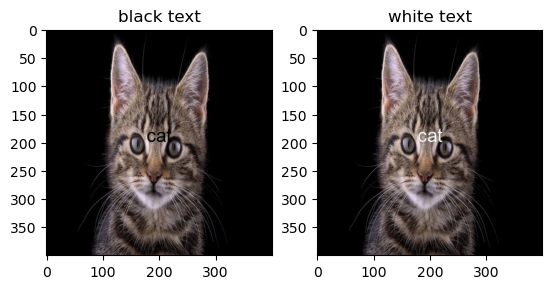

In [8]:



      
# import all the libraries
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import matplotlib.pyplot as plt
import numpy as np
 
# image opening
image = Image.open("cat1.jpeg")
# this open the photo viewer
image.show()  
plt.imshow(image)
 
# text Watermark
watermark_image = image.copy()
 
draw = ImageDraw.Draw(watermark_image)
# ("font type",font size)
w, h = image.size
x, y = int(w / 2), int(h / 2)
if x > y:
  font_size = y
elif y > x:
  font_size = x
else:
  font_size = x
   
font = ImageFont.truetype("arial.ttf", int(font_size/6))
 
# add Watermark
# (0,0,0)-black color text
draw.text((x, y), "cat", fill=(0, 0, 0), font=font, anchor='ms')
plt.subplot(1, 2, 1)
plt.title("black text")
plt.imshow(watermark_image)
 
# add Watermark
# (255,255,255)-White color text
draw.text((x, y), "cat", fill=(255, 255, 255), font=font, anchor='ms')
plt.subplot(1, 2, 2)
plt.title("white text")
plt.imshow(watermark_image)





In [9]:
##image filtering

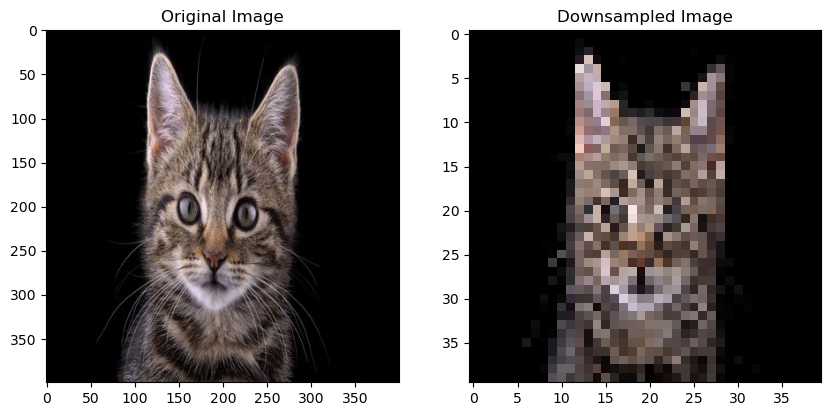

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the image
image = Image.open("cat1.jpeg")

# Convert the image to a NumPy array
image_array = np.array(image)

# Downsample the image array
pixelated = image_array[::10, ::10]

# Display the original and downsampled images
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax0.set_title('Original Image')
ax1.imshow(pixelated)
ax1.set_title('Downsampled Image')
plt.show()





In [11]:
height, width, channels = pixelated.shape
print("Height:", height)
print("Width:", width)
print(pixelated.shape)


Height: 40
Width: 40
(40, 40, 3)


In [12]:
import numpy as np

# Define a 3x3x3 mean kernel for RGB image
mean_kernel = np.ones((3, 3, 3)) / 9

# Print the shape of the kernel
print("Shape of Mean Kernel:", mean_kernel.shape)



Shape of Mean Kernel: (3, 3, 3)


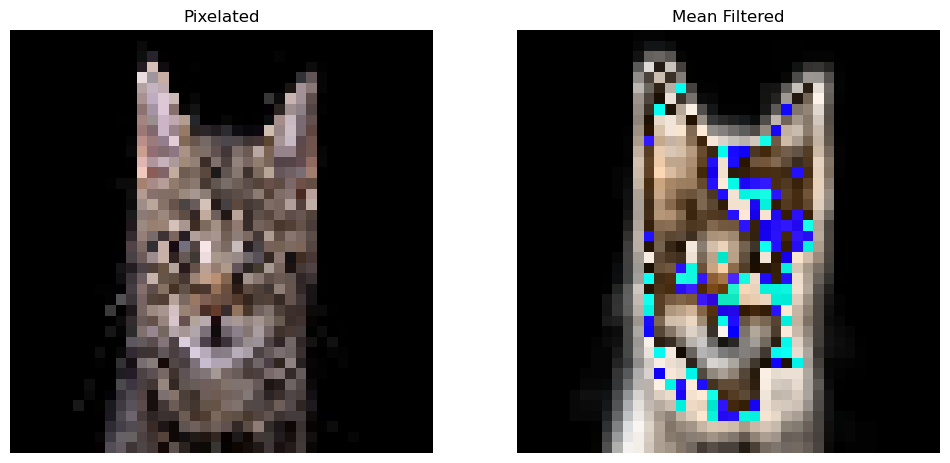

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

# Assuming you have already defined 'pixelated' and 'mean_kernel'

# Apply mean filter using ndi.correlate
filtered = ndimage.correlate(pixelated, mean_kernel)

# Define a function to display multiple images
def imshow_all(*images, titles=None):
    num_images = len(images)
    if titles is None:
        titles = ['Image {}'.format(i+1) for i in range(num_images)]
    
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, num_images, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display original and filtered images
imshow_all(pixelated, filtered, titles=['Pixelated', 'Mean Filtered'])


C:\Users\pujay\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


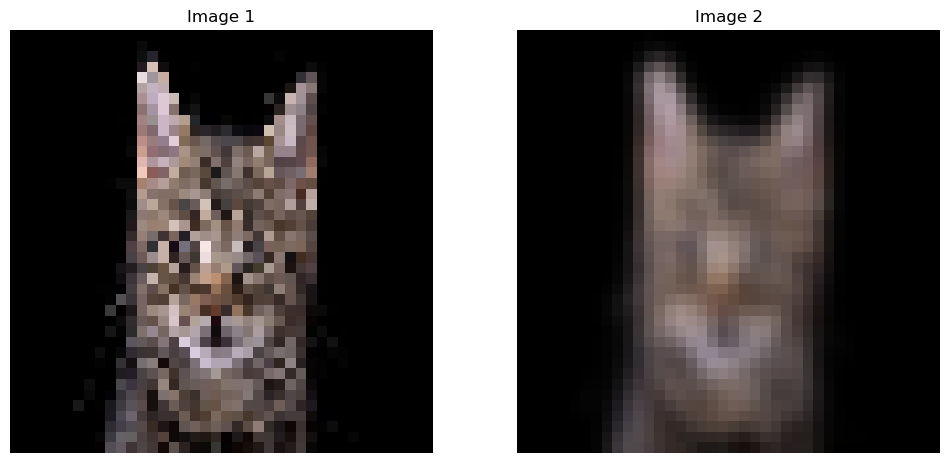

In [14]:
from skimage import img_as_float, filters
import matplotlib.pyplot as plt

pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)

# Define a function to display multiple images
def imshow_all(*images, titles=None):
    num_images = len(images)
    if titles is None:
        titles = ['Image {}'.format(i+1) for i in range(num_images)]
    
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, num_images, i)
        plt.imshow(image, cmap='gray')  # assuming grayscale images
        plt.title(title)
        plt.axis('off')
    plt.show()

imshow_all(pixelated_float, smooth)



C:\Users\pujay\AppData\Local\Temp\ipykernel_12800\2014659214.py:30: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  smooth_gaussian = filters.gaussian(pixelated_float, sigma=size, multichannel=True)


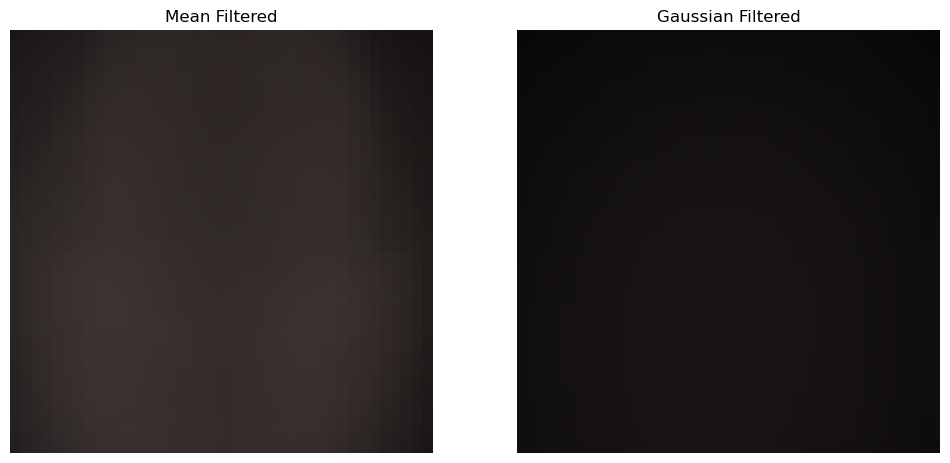

In [19]:
import numpy as np
from skimage import img_as_ubyte, img_as_float, filters
from skimage.morphology import disk
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open("cat1.jpeg")
image_array = np.array(image)

# Downsample the image array
pixelated = image_array[::10, ::10]

# Convert the pixelated image to float for Gaussian filter
pixelated_float = img_as_float(pixelated)

# Convert the pixelated image to uint8 for rank mean filter
pixelated_uint8 = img_as_ubyte(pixelated)

# Define a structuring element
size = 20
structuring_element = disk(size)  # Using disk-shaped structuring element

# Apply mean filter using rank.mean to each channel separately
smooth_mean = np.zeros_like(pixelated_uint8)
for i in range(3):  # Assuming RGB image
    smooth_mean[:, :, i] = filters.rank.mean(pixelated_uint8[:, :, i], structuring_element)

# Apply Gaussian filter
smooth_gaussian = filters.gaussian(pixelated_float, sigma=size, multichannel=True)

# Define a function to display multiple images
def imshow_all(*images, titles=None):
    num_images = len(images)
    if titles is None:
        titles = ['Image {}'.format(i+1) for i in range(num_images)]
    
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, num_images, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

titles = ['Mean Filtered', 'Gaussian Filtered']
imshow_all(smooth_mean, smooth_gaussian, titles=titles)



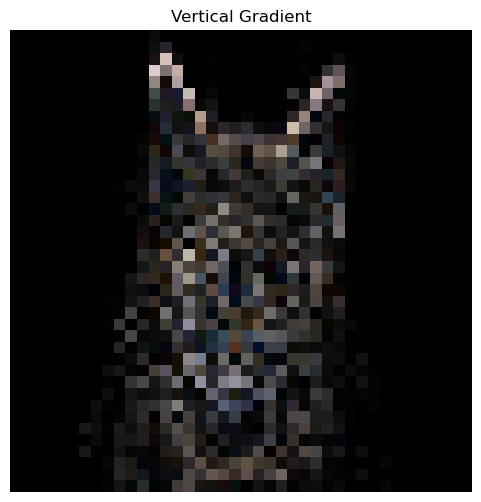

In [21]:
##vertical gradient



import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

# Load the image
image = Image.open("cat1.jpeg")
image_array = np.array(image)

# Downsample the image array
pixelated = image_array[::10, ::10]

# Define a vertical gradient kernel
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

# Apply the vertical gradient kernel to each channel
gradient_vertical = np.zeros_like(pixelated.astype(float))
for i in range(3):  # Assuming RGB image
    gradient_vertical[:, :, i] = ndimage.correlate(pixelated[:, :, i].astype(float), vertical_kernel)

# Display the gradient images
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.abs(gradient_vertical).astype(np.uint8))  # Take absolute value for better visualization
ax.set_title('Vertical Gradient')
ax.axis('off')
plt.show()


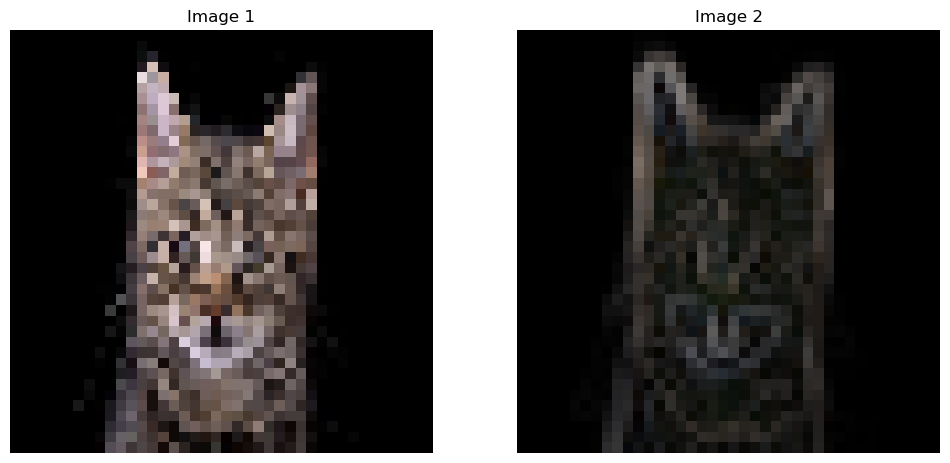

In [25]:

pixelated_gradient = filters.sobel(pixelated)
imshow_all(pixelated, pixelated_gradient)
titles = ['pixelated image', 'pixelated_gradien']

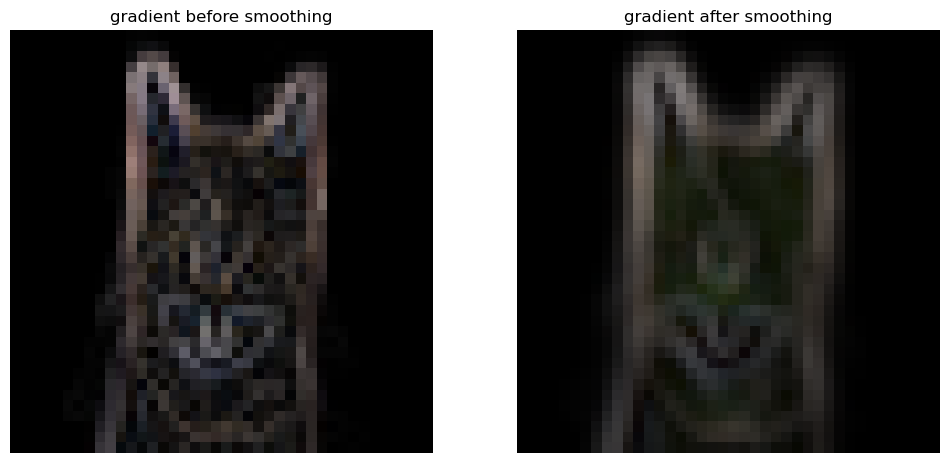

In [23]:
gradient = filters.sobel(smooth)
titles = ['gradient before smoothing', 'gradient after smoothing']
# Scale smoothed gradient up so they're of comparable brightness.
imshow_all(pixelated_gradient, gradient*1.8, titles=titles)

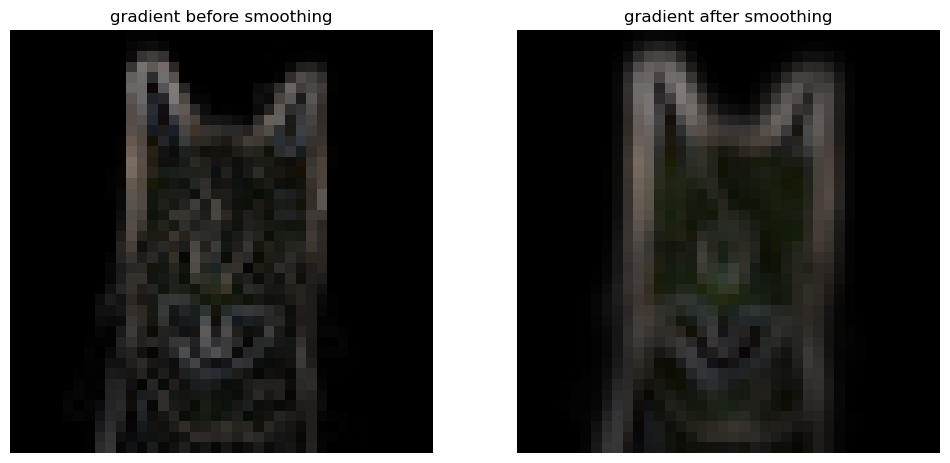

In [26]:
gradient = filters.sobel(smooth)
titles = ['gradient before smoothing', 'gradient after smoothing']
# Scale smoothed gradient up so they're of comparable brightness.
imshow_all(pixelated_gradient, gradient*1.8, titles=titles)

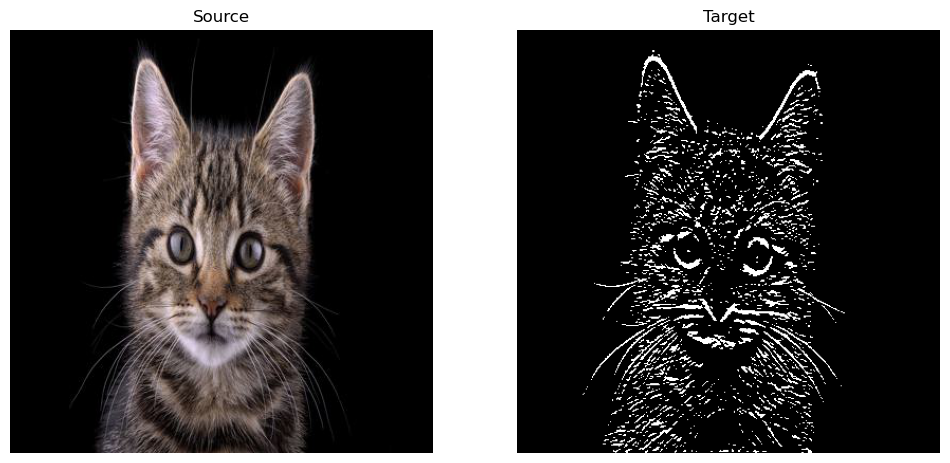

In [28]:
import numpy as np
from skimage import filters, color
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open("cat1.jpeg")
image_array = np.array(image)

# Convert the image to grayscale
image_gray = color.rgb2gray(image_array)

# Apply horizontal Sobel filter
target = filters.sobel_h(image_gray) > 0.07

# Define a function to display multiple images
def imshow_all(*images, titles=None):
    num_images = len(images)
    if titles is None:
        titles = ['Image {}'.format(i+1) for i in range(num_images)]
    
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, num_images, i)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display original and Sobel filtered images
titles = ['Source', 'Target']
imshow_all(image_array, target, titles=titles)


C:\Users\pujay\AppData\Local\Temp\ipykernel_12800\1589517386.py:22: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  smooth = filters.gaussian(pixelated_float, sigma=1, multichannel=True)


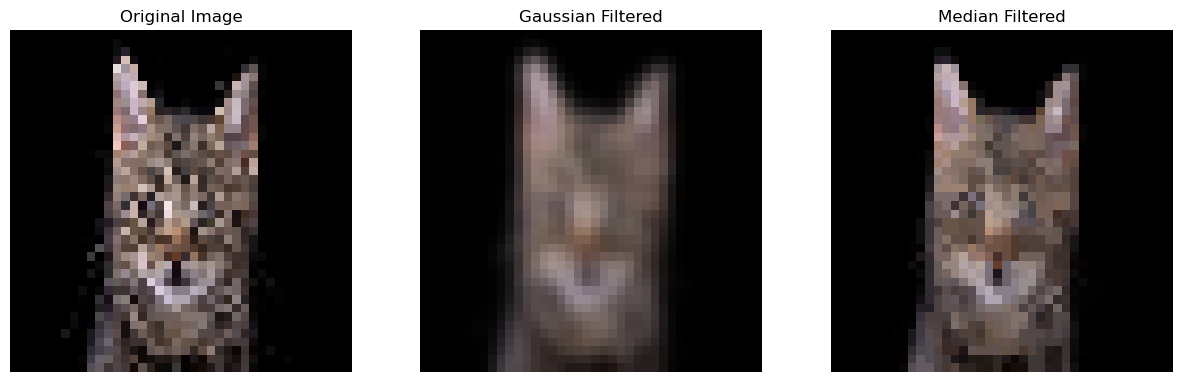

In [30]:
##Denoising filter 
import numpy as np
from skimage import img_as_ubyte, img_as_float, filters, color
from skimage.morphology import disk
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open("cat1.jpeg")
image_array = np.array(image)

# Downsample the image array
pixelated = image_array[::10, ::10]

# Convert the pixelated image to float for Gaussian filter
pixelated_float = img_as_float(pixelated)

# Convert the pixelated image to uint8 for rank median filter
pixelated_uint8 = img_as_ubyte(pixelated)

# Apply Gaussian filter
smooth = filters.gaussian(pixelated_float, sigma=1, multichannel=True)

# Define a structuring element
neighborhood = disk(radius=1)

# Apply median filter
median = np.zeros_like(pixelated_uint8)
for i in range(3):  # Assuming RGB image
    median[:, :, i] = filters.rank.median(pixelated_uint8[:, :, i], neighborhood)

# Define a function to display multiple images
def imshow_all(*images, titles=None):
    num_images = len(images)
    if titles is None:
        titles = ['Image {}'.format(i+1) for i in range(num_images)]
    
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, num_images, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display original, Gaussian filtered, and median filtered images
titles = ['Original Image', 'Gaussian Filtered', 'Median Filtered']
imshow_all(pixelated, smooth, median, titles=titles)
